In [3]:
from googleapiclient.discovery import build
import googleapiclient.discovery
import json
import pandas as pd
import csv

# Videos analyzed:
- https://www.youtube.com/watch?v=ceKMnyMYIMo
11958 comments.
# Videos to analyze:
- https://www.youtube.com/watch?v=v9WSjE3tIkg

# TO DO!
- Cleaning the data: are there multiple comments from the same user?
- Statistical analysis: what words do the most intensive comments contain?
 + make a subset with at least 500 comments that are most intensive
 + make a subset with 50 comments that are most neutral and try to see if the AI made mistakes; add to it a subset with the 50 comments that are most neutral and try to see if the AI made mistakes.

# Data Ingestion

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
from pandas.core.interchange.dataframe_protocol import Column
from email.parser import HeaderParser
#with open("/content/drive/MyDrive/ColabNotebooks for NLP and other ML/StrongInternetLanguage/clean_data.csv", 'r') as file:
#  csvreader = csv.reader(file)
#  clean_data = pd.DataFrame(data=csvreader, )
clean_data = pd.read_csv("/content/drive/MyDrive/ColabNotebooks for NLP and other ML/StrongInternetLanguage/clean_data.csv",
                         header=0, lineterminator='\n', usecols=["COMMENT"])

In [6]:
clean_data.head(25)

,COMMENT
0,i don t do social media so i m in the dark abo...
1,😮
2,what the fuck is this
3,i br br what?
4,wooooooooowwww
5,people saying this is a horrible apology ha...
6,honestly i don’t even know what side to believ...
7,what is this lol
8,never clicked so fast on a video
9,sometimes people can make mistakes i agree b...


# Sentiment Analysis
Using Vader NLP model.

In [7]:
!pip install vaderSentiment

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 2.9 MB/s eta 0:00:00


In [8]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [9]:
def sentiment_analyzer_scores(sentence, printable_output:True):
    score = analyzer.polarity_scores(sentence)
    if printable_output:
        print("{:-<40} {}".format(sentence, str(score)))
    return score['compound']

In [10]:
# TESTING THE SENTIMENT_ANALYZER with ambiguous sentences
sentiment_analyzer_scores('yo this kinda a bop😜😍 ', True) #this is probably sarcasm but also ambiguous
sentiment_analyzer_scores('Really nice caitleen, next time pull out a whole piano to sing your song', True)
#unfortunately, the last sarcastic sentence is not evaluated as negative. It's sarcastic because of elements of overly positive complimenting "really nice <name>, next time do x exaggerating it"
sentiment_analyzer_scores('this cannot be real come on', True) #also this is not evaluated in any way, but it is ambiguous.
sentiment_analyzer_scores("This sentence is really hateful and stupid, horrible, disgusting. I am happy and I am so grateful for this sentence instead. Now it is rather something, without further explanation, neutral.",
                          printable_output = True)


yo this kinda a bop😜😍 ------------------ {'neg': 0.0, 'neu': 0.8, 'pos': 0.2, 'compound': 0.4588}
Really nice caitleen, next time pull out a whole piano to sing your song {'neg': 0.0, 'neu': 0.808, 'pos': 0.192, 'compound': 0.4754}
this cannot be real come on------------- {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
This sentence is really hateful and stupid, horrible, disgusting. I am happy and I am so grateful for this sentence instead. Now it is rather something, without further explanation, neutral. {'neg': 0.304, 'neu': 0.476, 'pos': 0.22, 'compound': -0.7087}


-0.7087

In [11]:
clean_data['COMPOUND'] = clean_data['COMMENT'].apply(sentiment_analyzer_scores, printable_output = False)

In [12]:
clean_data.head(100) # to see the full comment, use interactive function of pandas

,COMMENT,COMPOUND
0,i don t do social media so i m in the dark abo...,0.9559
1,😮,0.0000
2,what the fuck is this,-0.5423
3,i br br what?,0.0000
4,wooooooooowwww,0.0000
...,...,...
95,… why would you do this while playing a ukelele,0.2023
96,what the actual fuck is wrong with her just m...,-0.9153
97,you were silent for 3 weeks just to come back ...,0.4019
98,she sang a song because they wouldn’t let her ...,0.9135


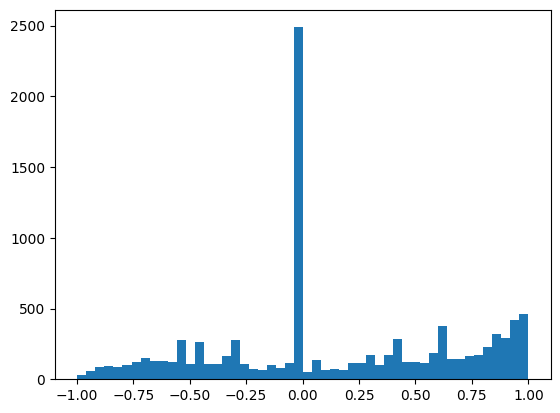

In [13]:
import matplotlib.pyplot as plt

plt.hist(clean_data['COMPOUND'], bins = 50)
plt.show()

In [14]:
clean_data['LABEL'] = clean_data['COMPOUND'].apply(lambda x: 'neg' if x < 0 else ('neu' if x == 0 else 'pos'))
clean_data['LENGTH'] = clean_data['COMMENT'].apply(lambda text: len([el if el != ' ' and el !=  'br' else None for el in text.split(' ')]))

In [15]:
clean_data.sort_values(by='COMPOUND', ascending=False)

,COMMENT,COMPOUND,LABEL,LENGTH
3213,colleen i’m sorry for all those things people ...,0.9999,pos,306
9258,sending so much love ❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤...,0.9999,pos,5
2943,i love you i love youi love youi love youi lov...,0.9999,pos,178
3862,i love you colleen i don t care about what pe...,0.9987,pos,27
1001,all i want to say is… all i need to say is… ...,0.9986,pos,18
...,...,...,...,...
8299,perhaps the comments people are saying about y...,-0.9857,neg,132
2987,seems like people forget there are two sides t...,-0.9890,neg,257
793,first every single person in this situation ...,-0.9896,neg,212
4766,the ukelele is killing me 😭😭😭😭😭😭😭😭😭😭😭😭😭😭,-0.9931,neg,6


In [16]:
!pip install plotnine

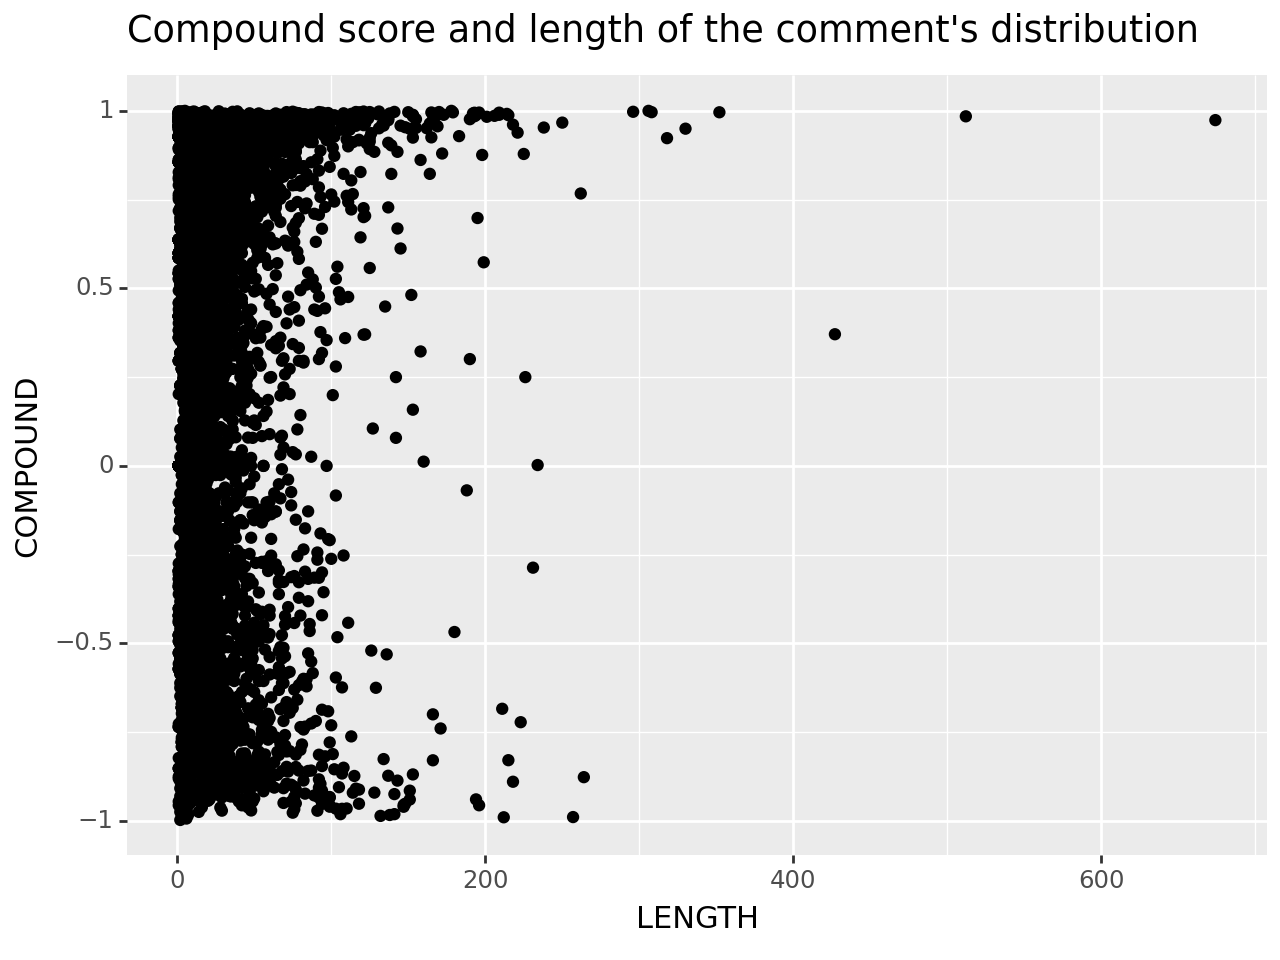

In [17]:
from plotnine import *
p = ggplot(data=clean_data, mapping=aes(y='COMPOUND', x='LENGTH')) + \
    geom_point() + \
    labs(title='Compound score and length of the comment\'s distribution', y='COMPOUND', x='LENGTH')
print(p)


In [18]:
import numpy as np

In [19]:
r = np.corrcoef(clean_data['COMPOUND'], clean_data['LENGTH'])
print("The correlation coefficient between length and compound score is:" + str(r[0, 1])[:6]) #Thankfully, there is little correlation between length and compound.
# Below you can see there are few comments that make it above 200 words, but they are not spam and are actually very useful for this analysis.
# there are a few spam comments but they don't do much harm to the research,
# question, as the spam was meant to be offensive or very positive as a reaction to the video and not to change topic.


The correlation coefficient between length and compound score is:0.1635


In [20]:
clean_data

,COMMENT,COMPOUND,LABEL,LENGTH
0,i don t do social media so i m in the dark abo...,0.9559,pos,22
1,😮,0.0000,neu,1
2,what the fuck is this,-0.5423,neg,5
3,i br br what?,0.0000,neu,6
4,wooooooooowwww,0.0000,neu,1
...,...,...,...,...
10042,the ultimate move out troll the trolls! she p...,0.5411,pos,24
10043,girl first you call them mistakes and then rum...,-0.3612,neg,20
10044,i love you so much ❤,0.8646,pos,7
10045,2023 isn’t real,0.0000,neu,3


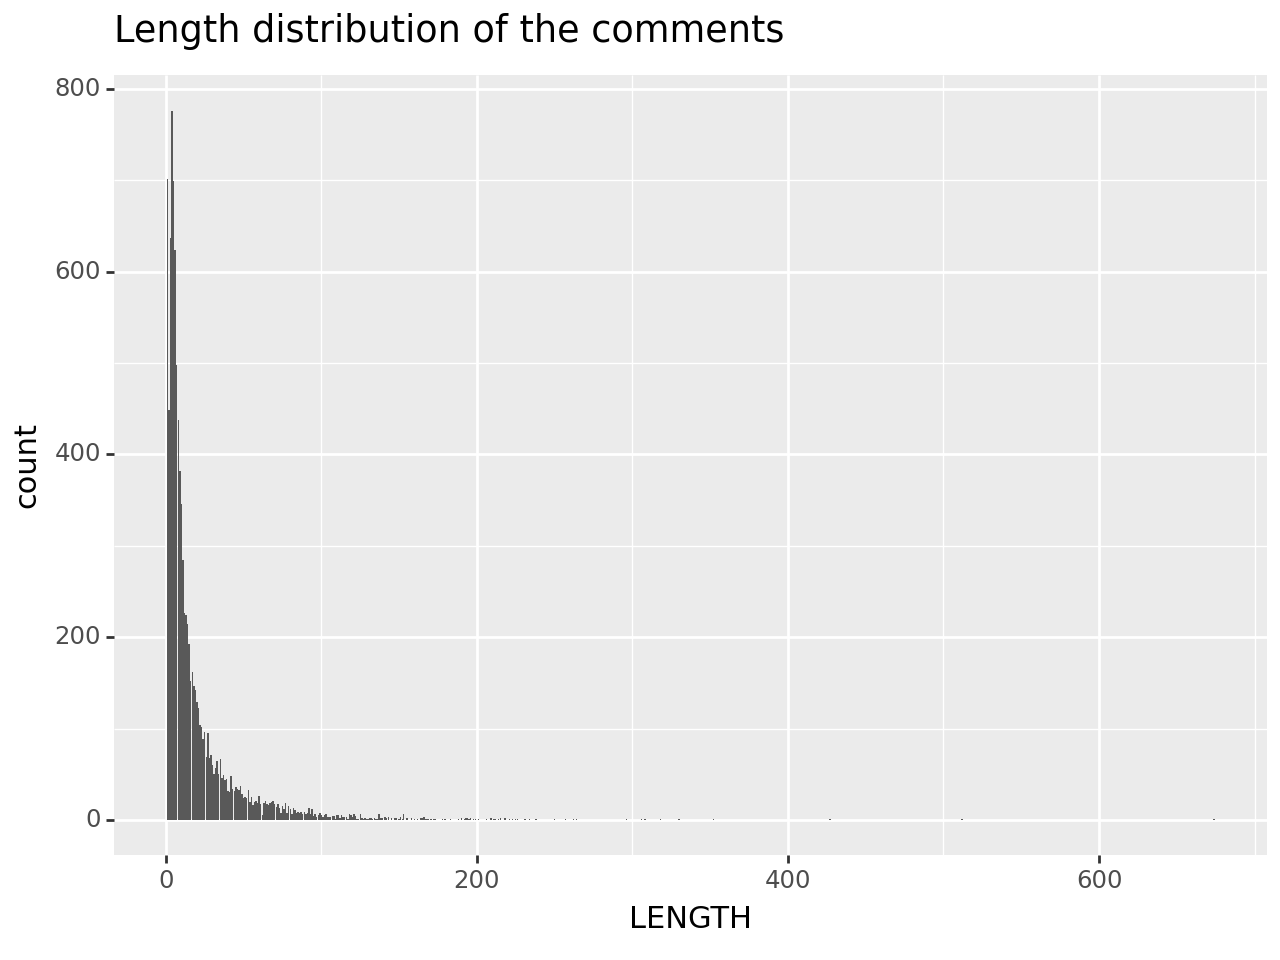

 [[1.         0.16359391]
 [0.16359391 1.        ]]


In [21]:
p = (ggplot(clean_data, aes('LENGTH')) +
     geom_bar() +
     labs(title='Length distribution of the comments')
)
print(p, r)

# Evaluation
To evaluate, I will make ground truth using my own perception of comments. I am aware that my perception might differ from what the authors of the comments have meant, but my perception is by far still better than this model as I could tell.

Sarcasm went often unnoticed - even when it was pretty offensive, take this actual example from the data:
- "she really thought she ate omg 😂🤡🤡".

It's sarcastic and slang to say that "she [the youtuber] thought she did a good job, oh my god [laughing emoji, clown emoji twice]". Using the clown emoji and using sarcasm went unnoticed, and it had $0.44$ on a scale from $-1$ (negative) to $1$ (positive) as compound score made from negative, neutral and positive scores attributed.

Personally, I believe this model is biased towards negative comments and tends to pick them up as positive even when to humans they could be seen as subtly negative or sarcastic.

# Sampling original comments for expert annotation
In order to annotate comments, I need to have the original version with all the punctuation and especially if they used caps lock (which has a different tone of voice), as those elements actually help me better understand the feeling of the original commentor.


In [26]:
with open("/content/drive/MyDrive/ColabNotebooks for NLP and other ML/StrongInternetLanguage/raw_comments.json", "r") as f:
    to_sample = json.load(f)
    to_sample = pd.DataFrame(to_sample.values())

In [29]:
sample = to_sample.sample(n=1000, replace=False, random_state=25) #25 is the seed
sample.to_csv('/content/drive/MyDrive/ColabNotebooks for NLP and other ML/StrongInternetLanguage/sample_for_groundtruth.csv', index=True)